In [70]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import numpy as np
import xgboost as xgb

In [71]:
df = pd.read_csv('data/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding = "ISO-8859-1", delimiter=';')
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [72]:
df = df[['Ngày','12', '13']]
df

,Ngày,12,13
0,01/01/2021,964.4,964.4
1,01/02/2021,1019.7,1019.7
2,01/03/2021,988.4,988.4
3,01/04/2021,1010.8,1010.8
4,01/05/2021,1061.5,1061.5
...,...,...,...
360,27/12/2021,1002.0,1002.0
361,28/12/2021,1002.0,1002.0
362,29/12/2021,1061.5,1061.5
363,30/12/2021,1022.6,1022.6


### EDA

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ngày    365 non-null    object 
 1   12      365 non-null    float64
 2   13      365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [74]:
df.isnull().sum()

Ngày    0
12      0
13      0
dtype: int64

In [75]:
df.head(5)

,Ngày,12,13
0,01/01/2021,964.4,964.4
1,01/02/2021,1019.7,1019.7
2,01/03/2021,988.4,988.4
3,01/04/2021,1010.8,1010.8
4,01/05/2021,1061.5,1061.5


In [76]:
df.tail(5)

,Ngày,12,13
360,27/12/2021,1002.0,1002.0
361,28/12/2021,1002.0,1002.0
362,29/12/2021,1061.5,1061.5
363,30/12/2021,1022.6,1022.6
364,31/12/2021,1022.6,1022.6


In [77]:
df.dtypes

Ngày     object
12      float64
13      float64
dtype: object

In [117]:
df.dtypes

12          float64
13          float64
Clusters      int64
dtype: object

In [78]:
df = df.rename(columns={'Ngày': 'Date'})
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df

,12,13
Date,,
2021-01-01,964.4,964.4
2021-02-01,1019.7,1019.7
2021-03-01,988.4,988.4
2021-04-01,1010.8,1010.8
2021-05-01,1061.5,1061.5
...,...,...
2021-12-27,1002.0,1002.0
2021-12-28,1002.0,1002.0
2021-12-29,1061.5,1061.5


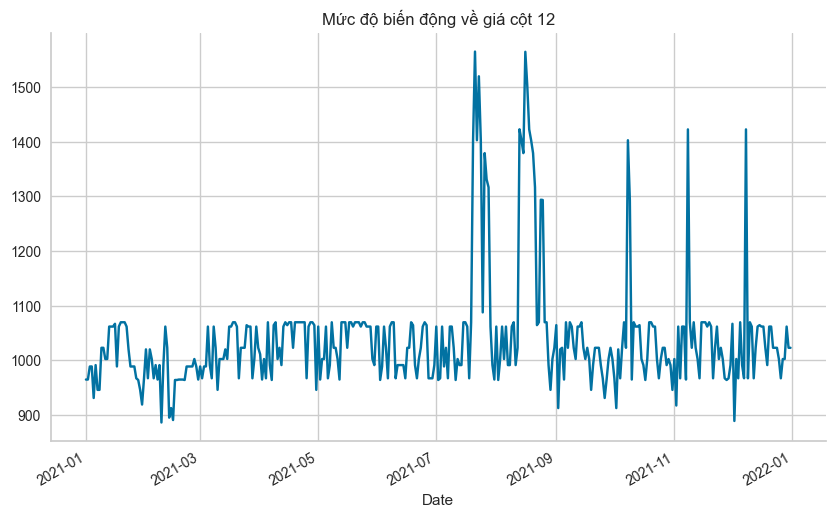

In [79]:
plt.figure(figsize=(6,10))
df['12'].plot(kind='line', figsize=(10, 6), title='Mức độ biến động về giá cột 12')
plt.gca().spines[['top', 'right']].set_visible(False)

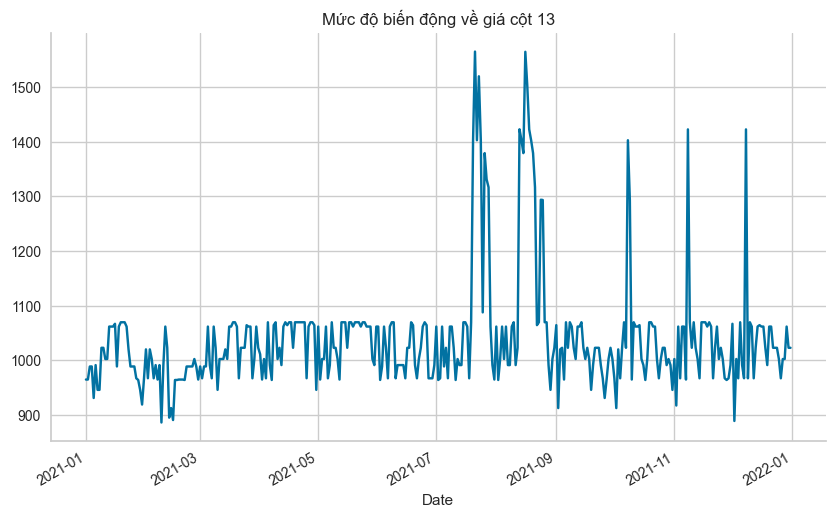

In [80]:
plt.figure(figsize=(6,10))
df['13'].plot(kind='line', figsize=(10, 6), title='Mức độ biến động về giá cột 13')
plt.gca().spines[['top', 'right']].set_visible(False)

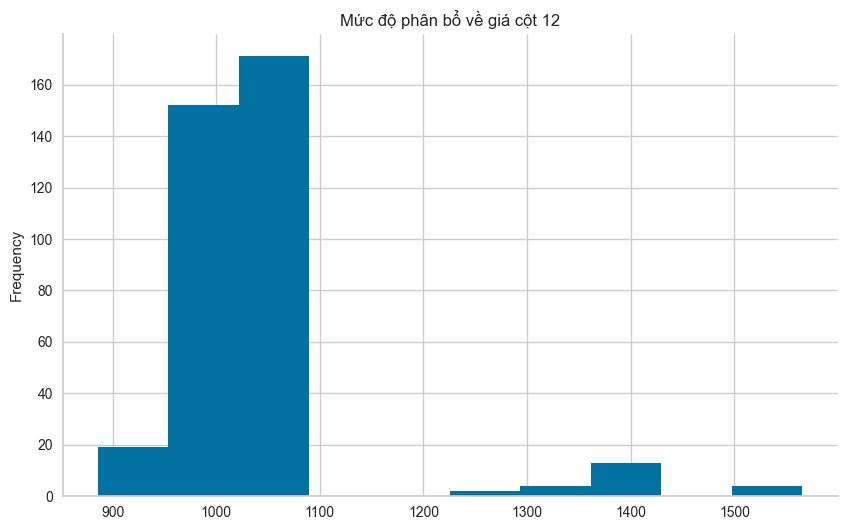

In [81]:
plt.figure(figsize=(6,10))
df['12'].plot(kind='hist', figsize=(10, 6), title='Mức độ phân bổ về giá cột 12')
plt.gca().spines[['top', 'right']].set_visible(False)

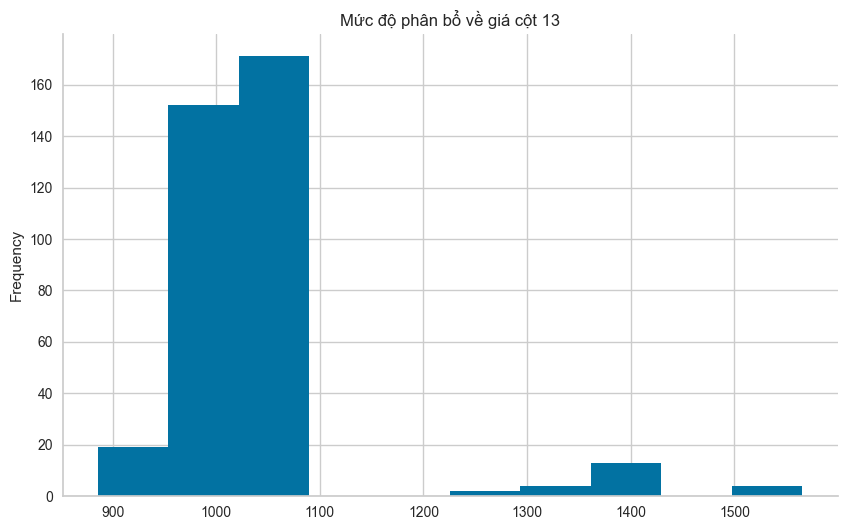

In [82]:
plt.figure(figsize=(6,10))
df['13'].plot(kind='hist', figsize=(10, 6), title='Mức độ phân bổ về giá cột 13')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

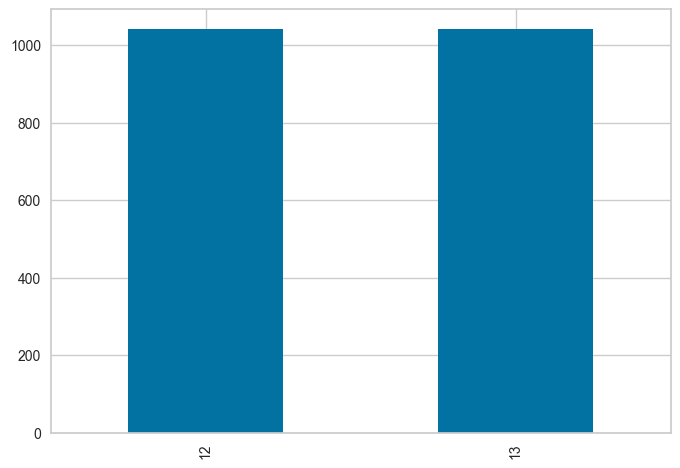

In [83]:
df[['12', '13']].mean().plot(kind='bar')

### Bayesian Gaussian Mixture

In [84]:
transformer = StandardScaler()
X = transformer.fit_transform(df[['12', '13']])
X

array([[-0.72294657, -0.72295646],
       [-0.19629459, -0.19630298],
       [-0.49438151, -0.49439075],
       [-0.28105413, -0.28106276],
       [ 0.20178954,  0.20178229],
       [ 0.20178954,  0.20178229],
       [ 0.20178954,  0.20178229],
       [ 0.20178954,  0.20178229],
       [ 0.22655076,  0.22654358],
       [-0.70104242, -0.70105224],
       [-0.36486132, -0.36487019],
       [ 0.25035962,  0.2503525 ],
       [ 0.20178954,  0.20178229],
       [ 0.20178954,  0.20178229],
       [ 0.20178954,  0.20178229],
       [ 0.25035962,  0.2503525 ],
       [-0.49438151, -0.49439075],
       [ 0.20178954,  0.20178229],
       [ 0.27702554,  0.2770185 ],
       [ 0.27702554,  0.2770185 ],
       [ 0.27702554,  0.2770185 ],
       [ 0.20178954,  0.20178229],
       [-0.19629459, -0.19630298],
       [-0.49533387, -0.49534311],
       [-0.49438151, -0.49439075],
       [-0.49438151, -0.49439075],
       [-0.70104242, -0.70105224],
       [-0.7305654 , -0.73057531],
       [-0.90294155,

Elbow Method to determine the number of clusters to be formed:


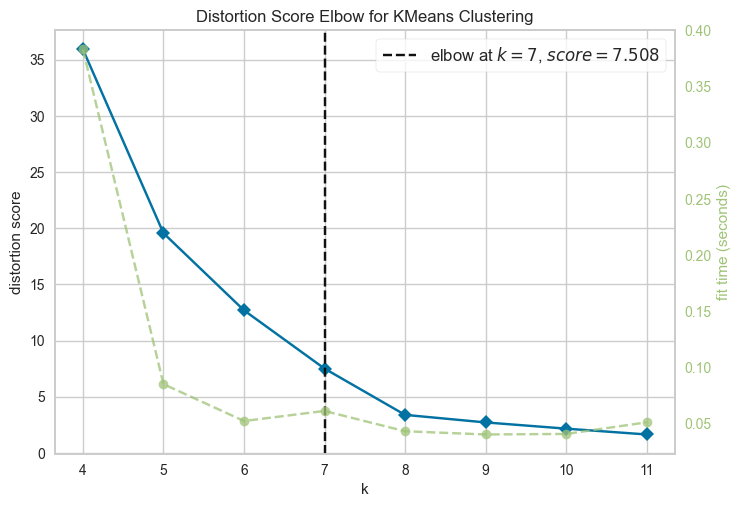

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23, n_init=10), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

In [87]:
BGM = BayesianGaussianMixture(n_components=8,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [89]:
df['Clusters'].value_counts()

Clusters
0    216
2    126
1     23
Name: count, dtype: int64

### Prophet

In [104]:
X = pd.DataFrame(df['12'])
X = X.reset_index()
X = X.rename(columns={'Date': 'ds', '12': 'y'})
X

,ds,y
0,2021-01-01,964.4
1,2021-02-01,1019.7
2,2021-03-01,988.4
3,2021-04-01,1010.8
4,2021-05-01,1061.5
...,...,...
360,2021-12-27,1002.0
361,2021-12-28,1002.0
362,2021-12-29,1061.5
363,2021-12-30,1022.6


In [106]:
from prophet import Prophet
model = Prophet(interval_width=0.95)
model.fit(X)

11:52:21 - cmdstanpy - INFO - Chain [1] start processing
11:52:21 - cmdstanpy - INFO - Chain [1] done processing


In [120]:
future = model.make_future_dataframe(periods=15)
future.tail(30)

,ds
350,2021-12-17
351,2021-12-18
352,2021-12-19
353,2021-12-20
354,2021-12-21
355,2021-12-22
356,2021-12-23
357,2021-12-24
358,2021-12-25
359,2021-12-26


In [121]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
375,2022-01-11,1010.827402,816.874757,1203.837393
376,2022-01-12,1026.349540,832.142732,1223.530356
377,2022-01-13,1001.340788,831.413627,1196.211708
378,2022-01-14,1019.167254,821.597301,1205.389164
379,2022-01-15,999.073687,807.888858,1184.310726


In [116]:
forecast = model.make_future_dataframe(periods=30)
forecast = model.predict(forecast)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,974.721003,796.736712,1170.446996,974.721003,974.721003,16.884827,16.884827,16.884827,16.884827,16.884827,16.884827,0.0,0.0,0.0,991.605830
1,2021-01-02,975.258167,788.926934,1155.847321,975.258167,975.258167,-2.644759,-2.644759,-2.644759,-2.644759,-2.644759,-2.644759,0.0,0.0,0.0,972.613409
2,2021-01-03,975.795332,739.716736,1131.219958,975.795332,975.795332,-44.387975,-44.387975,-44.387975,-44.387975,-44.387975,-44.387975,0.0,0.0,0.0,931.407356
3,2021-01-04,976.332496,799.412383,1178.762727,976.332496,976.332496,1.861344,1.861344,1.861344,1.861344,1.861344,1.861344,0.0,0.0,0.0,978.193840
4,2021-01-05,976.869660,807.415931,1153.615626,976.869660,976.869660,6.853032,6.853032,6.853032,6.853032,6.853032,6.853032,0.0,0.0,0.0,983.722692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2022-01-26,995.514653,833.735797,1224.027113,992.913818,998.150783,22.939151,22.939151,22.939151,22.939151,22.939151,22.939151,0.0,0.0,0.0,1018.453804
391,2022-01-27,994.950672,794.945746,1183.141868,992.214309,997.718709,-1.505620,-1.505620,-1.505620,-1.505620,-1.505620,-1.505620,0.0,0.0,0.0,993.445053
392,2022-01-28,994.386691,826.024939,1181.019671,991.508066,997.326455,16.884827,16.884827,16.884827,16.884827,16.884827,16.884827,0.0,0.0,0.0,1011.271518
393,2022-01-29,993.822710,788.246056,1182.053658,990.801364,996.955099,-2.644759,-2.644759,-2.644759,-2.644759,-2.644759,-2.644759,0.0,0.0,0.0,991.177951
